In [1]:
import models
from models import get_raw_data, extrair_indicadores, indicadores_frequencia, get_rpm, filtro_passa_baixa
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
pasta = 'database/dados_brutos/normal' # for n1
arquivos = os.listdir(pasta) # for n2
arquivo = arquivos[1] # for n3
coluna = 1 # for n4

frequencia_de_referencia = models.frequencias_rolamento
dataframe = []
ordens_frequencia = 5
largura_banda = 2

In [3]:
sinal = get_raw_data.GetData(pasta,arquivo,coluna).Get()
sinal_rpm = get_raw_data.GetData(pasta,arquivo,0).Get()

rpm = get_rpm.GetRPM(sinal_rpm).get_rpm_medio()

for i in range(len(frequencia_de_referencia)):
    frequencia_de_referencia[i] = frequencia_de_referencia[i]*rpm
    
rpm

12.896569512509673

In [4]:
Objeto_Frequencia = indicadores_frequencia.DominioFrequencia(sinal,rpm)



c:\Users\leona\Documents\ProjetoFinal_LeonardoPacheco_UFRJ_LAVI\.venv\lib\site-packages\matplotlib\transforms.py:2865: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])
c:\Users\leona\Documents\ProjetoFinal_LeonardoPacheco_UFRJ_LAVI\.venv\lib\site-packages\numpy\ma\core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


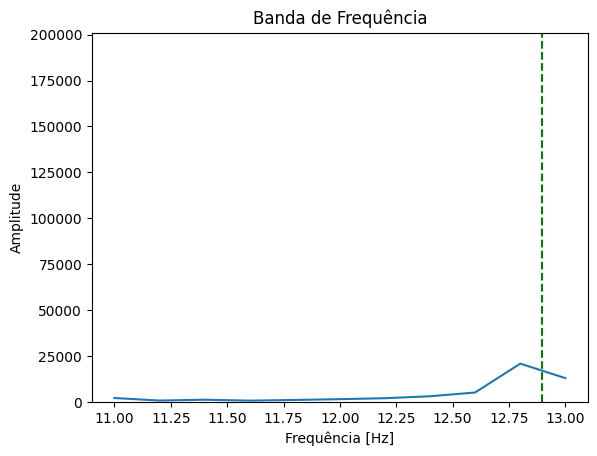

In [5]:
Objeto_Frequencia.plot_banda(rpm,2)

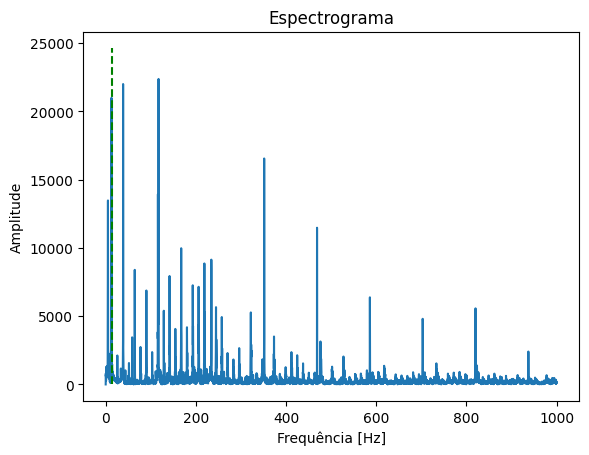

In [6]:
Objeto_Frequencia.plot_fft()

In [7]:
sinal_filtrado = filtro_passa_baixa.Filtro(sinal,10000,5).FiltroPassaBaixa()


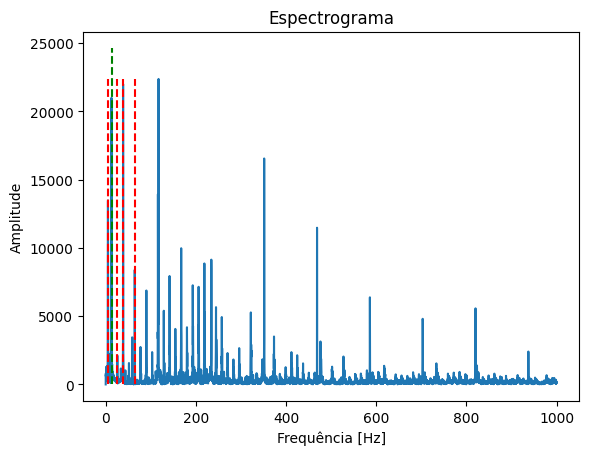

In [8]:
Objeto_Frequencia = indicadores_frequencia.DominioFrequencia(sinal_filtrado,rpm)
Objeto_Frequencia.plot_fft(frequencia_de_referencia)

In [9]:
for freq in frequencia_de_referencia:
    freq = np.round(freq,1)
    fourier_banda, frequencia_banda = Objeto_Frequencia.banda_frequencia(freq,2)
    soma = np.round(np.real(Objeto_Frequencia.soma_sinal(fourier_banda)),1)
    print(f'frequencia {freq} Hz - soma = {soma}')

frequencia 24.1 Hz - soma = 3195.1
frequencia 4.8 Hz - soma = 36625.6
frequencia 38.7 Hz - soma = 40470.1
frequencia 64.5 Hz - soma = 15876.5


In [10]:
Objeto_Extrair = extrair_indicadores.ExtrairIndicadores(pasta,
                                                        arquivo,
                                                        1,
                                                        frequencia_de_referencia)

In [11]:
pd.json_normalize(Objeto_Extrair.Get())

,rotacao_hz,maximo,rms,assimetria,curtose,soma_ball_fault,soma_cage_fault,soma_outer_race,soma_inner_race
0,12.89657,1.9806,1.245586,0.360691,0.984769,3195.142182,36625.544468,40470.514294,15876.750163
